In [1]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from utils import *
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, Nadam
from keras import regularizers
from keras import utils
import warnings
warnings.filterwarnings("ignore")

In [2]:
PATH_TRAIN = "../processed_data/cleaned_data/clean_data.csv"
PATH_TEST = "../processed_data/cleaned_data/clean_test_data.csv"

train_df = pd.read_csv(PATH_TRAIN)
test_df = pd.read_csv(PATH_TEST)

print("Train data shape:", train_df.shape)
print("Test data shape:", test_df.shape)

Train data shape: (13056, 91)
Test data shape: (3091, 91)


In [3]:
X_train_total = train_df.drop(["Participant_ID", "Depression"], axis=1)
y_train_total = train_df[["Participant_ID", "Depression", "Gender"]]

X_test = test_df.drop(["Participant_ID", "Depression"], axis=1)
y_test = test_df[["Participant_ID", "Depression", "Gender"]]

In [4]:
selection_df = pd.read_csv("../outputs/correlation.csv")

corr_sorted = selection_df["d_corr"].sort_values(ascending=False)
features_sorted = selection_df.iloc[corr_sorted.index]["features"]

n_features_list = list(range(5, 90, 5))
Bacc_lst = []
acc_lst = []
eo_scores = []

Model complete for n:  5
----------------------------
Model metrics: 
True Positive Rate - Males:  1.0
True Positive Rate - Females:  1.0


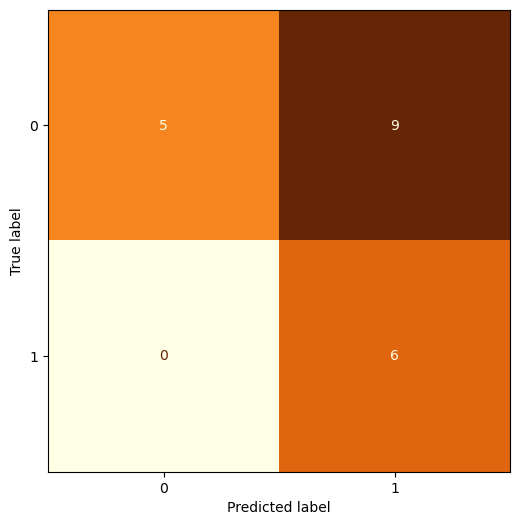

----------------------------


Model complete for n:  10
----------------------------
Model metrics: 
True Positive Rate - Males:  1.0
True Positive Rate - Females:  1.0


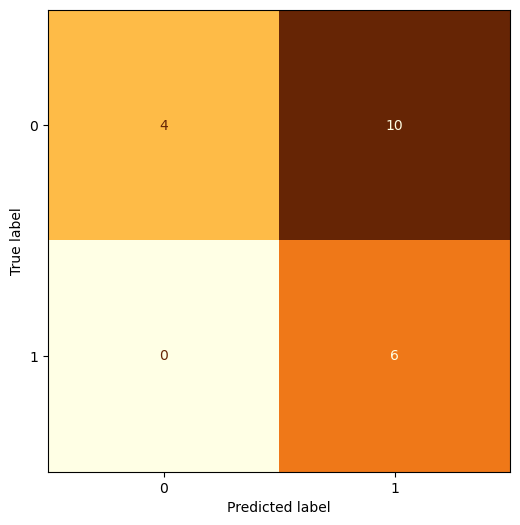

----------------------------
Model complete for n:  15
----------------------------
Model metrics: 
True Positive Rate - Males:  1.0
True Positive Rate - Females:  0.8


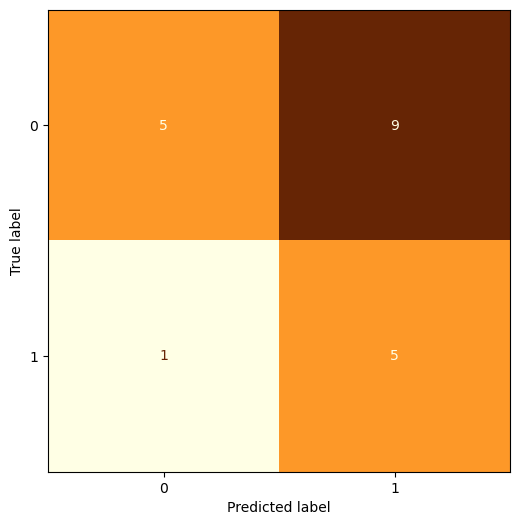

----------------------------
Model complete for n:  20
----------------------------
Model metrics: 
True Positive Rate - Males:  1.0
True Positive Rate - Females:  0.6


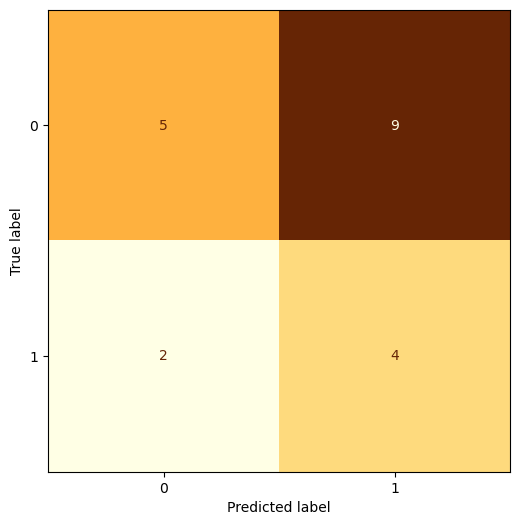

----------------------------
Model complete for n:  25
----------------------------
Model metrics: 
True Positive Rate - Males:  1.0
True Positive Rate - Females:  0.8


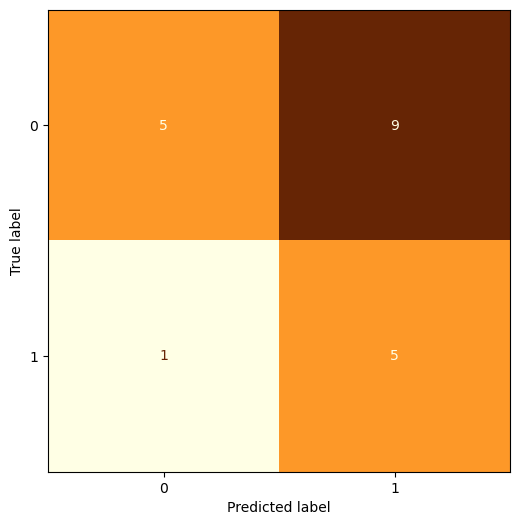

----------------------------
Model complete for n:  30
----------------------------
Model metrics: 
True Positive Rate - Males:  1.0
True Positive Rate - Females:  1.0


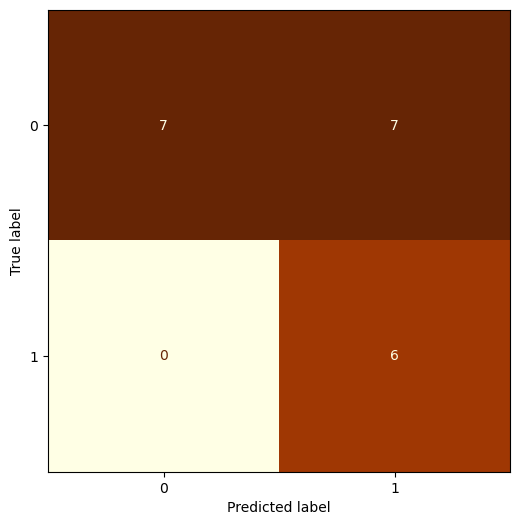

----------------------------
Model complete for n:  35
----------------------------
Model metrics: 
True Positive Rate - Males:  1.0
True Positive Rate - Females:  0.8


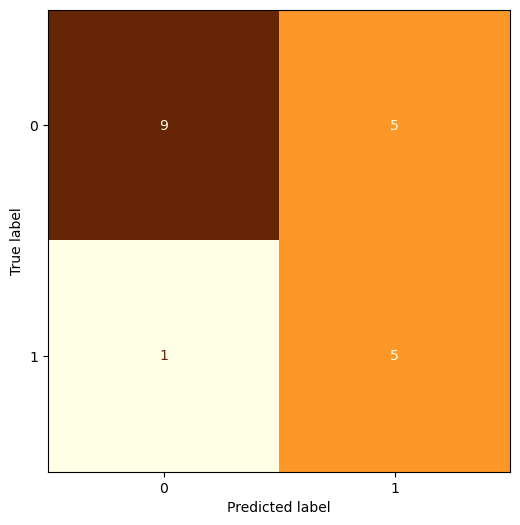

----------------------------
Model complete for n:  40
----------------------------
Model metrics: 
True Positive Rate - Males:  1.0
True Positive Rate - Females:  0.6


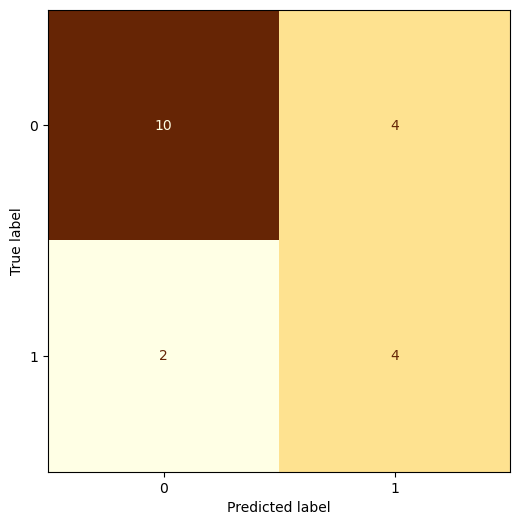

----------------------------
Model complete for n:  45
----------------------------
Model metrics: 
True Positive Rate - Males:  1.0
True Positive Rate - Females:  0.8


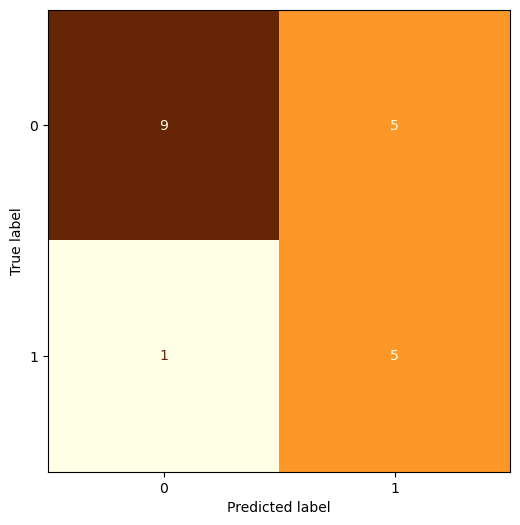

----------------------------
Model complete for n:  50
----------------------------
Model metrics: 
True Positive Rate - Males:  1.0
True Positive Rate - Females:  0.8


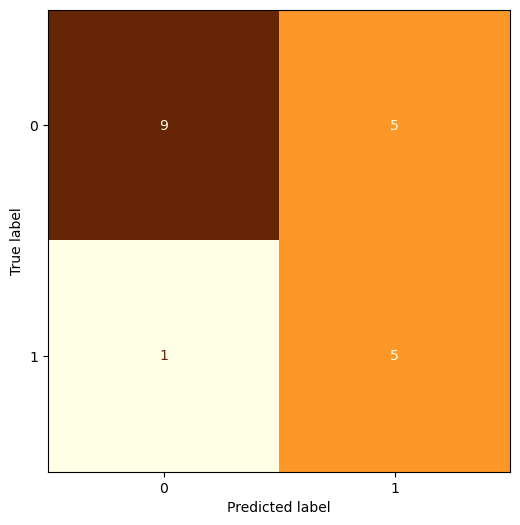

----------------------------
Model complete for n:  55
----------------------------
Model metrics: 
True Positive Rate - Males:  1.0
True Positive Rate - Females:  0.6


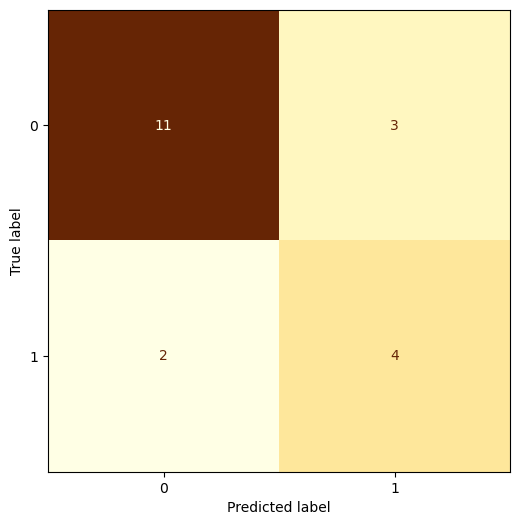

----------------------------
Model complete for n:  60
----------------------------
Model metrics: 
True Positive Rate - Males:  1.0
True Positive Rate - Females:  0.6


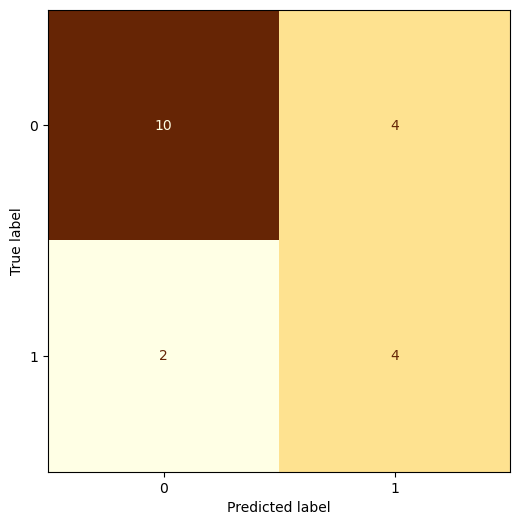

----------------------------
Model complete for n:  65
----------------------------
Model metrics: 
True Positive Rate - Males:  0.0
True Positive Rate - Females:  0.8


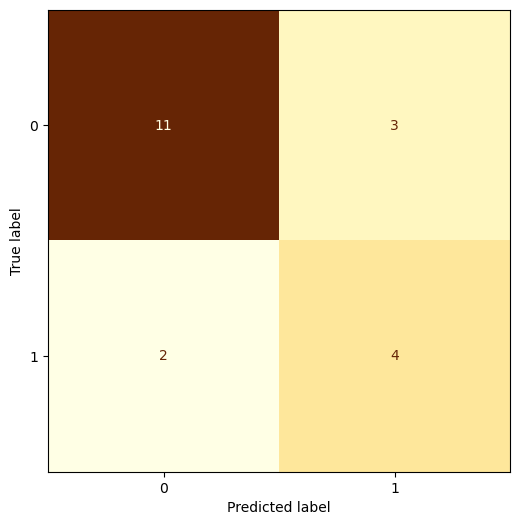

----------------------------
Model complete for n:  70
----------------------------
Model metrics: 
True Positive Rate - Males:  1.0
True Positive Rate - Females:  0.8


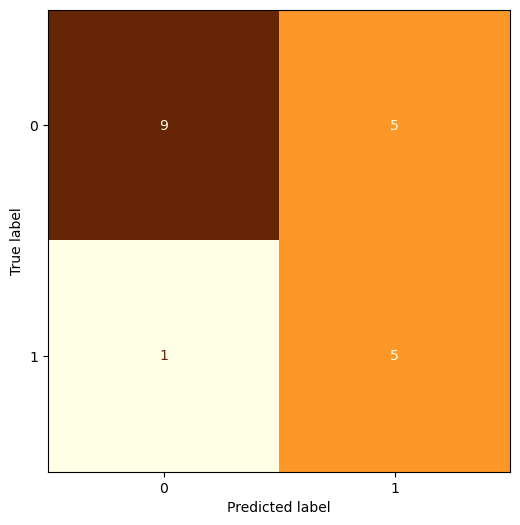

----------------------------
Model complete for n:  75
----------------------------
Model metrics: 
True Positive Rate - Males:  1.0
True Positive Rate - Females:  0.4


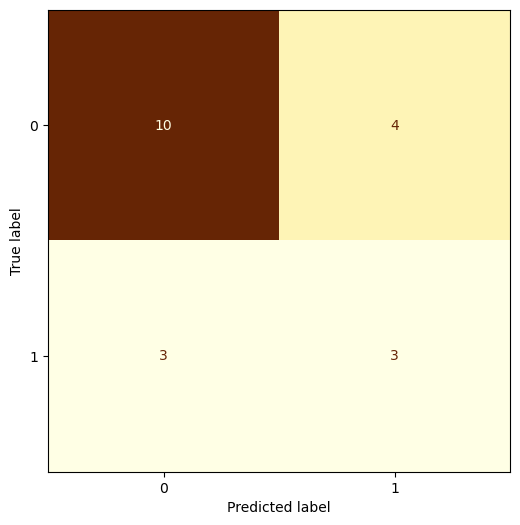

----------------------------
Model complete for n:  80
----------------------------
Model metrics: 
True Positive Rate - Males:  1.0
True Positive Rate - Females:  0.6


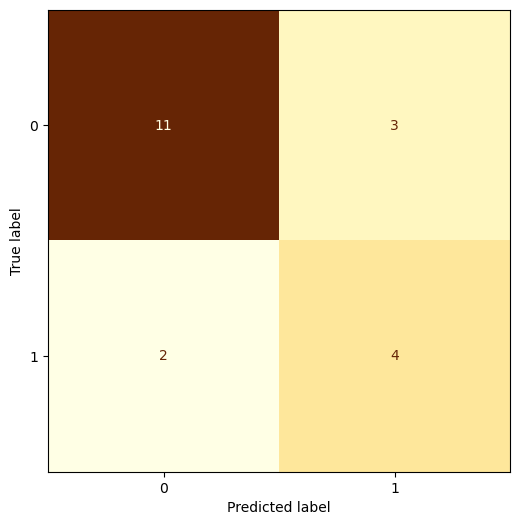

----------------------------
Model complete for n:  85
----------------------------
Model metrics: 
True Positive Rate - Males:  1.0
True Positive Rate - Females:  0.4


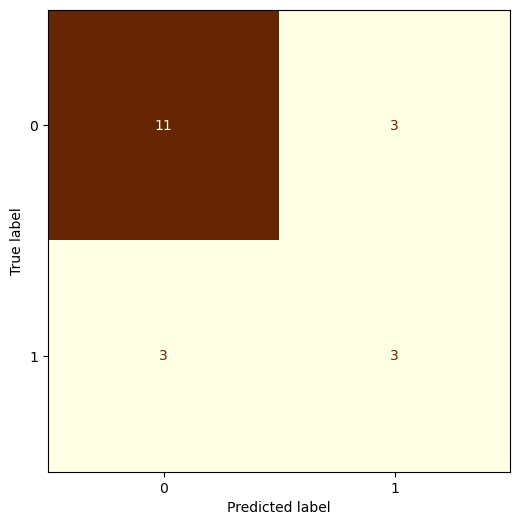

----------------------------


In [5]:
for n in n_features_list:
    
    # remove the features that aren't selected
    n_sorted_1 = features_sorted[:int(n/2)].values
    n_sorted_2 = features_sorted[-int(np.ceil(n/2)):].values
    n_sorted = np.concatenate([n_sorted_1, n_sorted_2])
    columns_to_remove = [feature for feature in features_sorted if feature not in n_sorted] + ['Gender'] 

    train_subset = X_train_total.drop(columns_to_remove, axis=1)
    
    scaler = StandardScaler()
    X_scaled_total = scaler.fit_transform(train_subset)
    X_scaled_test = scaler.transform(X_test.drop(columns_to_remove, axis=1))

    utils.set_random_seed(3)
    model3 = Sequential()
    model3.add(Dense(32, activation='relu', input_shape=(X_scaled_total.shape[1],),kernel_regularizer=regularizers.L2(0.0001)))
    # model3.add(Dense(32, activation='relu',kernel_regularizer=regularizers.L2(0.0001)))
    model3.add(Dense(16, activation='relu',kernel_regularizer=regularizers.L2(0.0001)))
    model3.add(Dense(8, activation='relu',kernel_regularizer=regularizers.L2(0.0001)))
    # model3.add(Dense(8, activation='relu',kernel_regularizer=regularizers.L2(0.0001)))
    model3.add(Dense(1, activation="sigmoid"))
    model3.compile(loss="binary_crossentropy", optimizer = Nadam(learning_rate=0.001),metrics=["accuracy"])
    trained_model = model3.fit(X_scaled_total, np.array(y_train_total["Depression"]), 
                           epochs=20,batch_size=16, 
                           class_weight = {0: 1, 1: 4},
                           verbose=0)
    print("Model complete for n: ", n)
    print("----------------------------")
    print("Model metrics: ")
    y_pred = model3.predict(X_scaled_test, verbose=0)
    y_test["Depression_predicted"] = np.where(y_pred>=0.5,1,0)
    acc, bal_acc, eo_score = compute_metrics(y_test, eo=True, print_metrics=True)
    acc_lst.append(acc)
    Bacc_lst.append(bal_acc)
    eo_scores.append(eo_score)
    show_conf_matrix(y_test)
    print("----------------------------")

[]

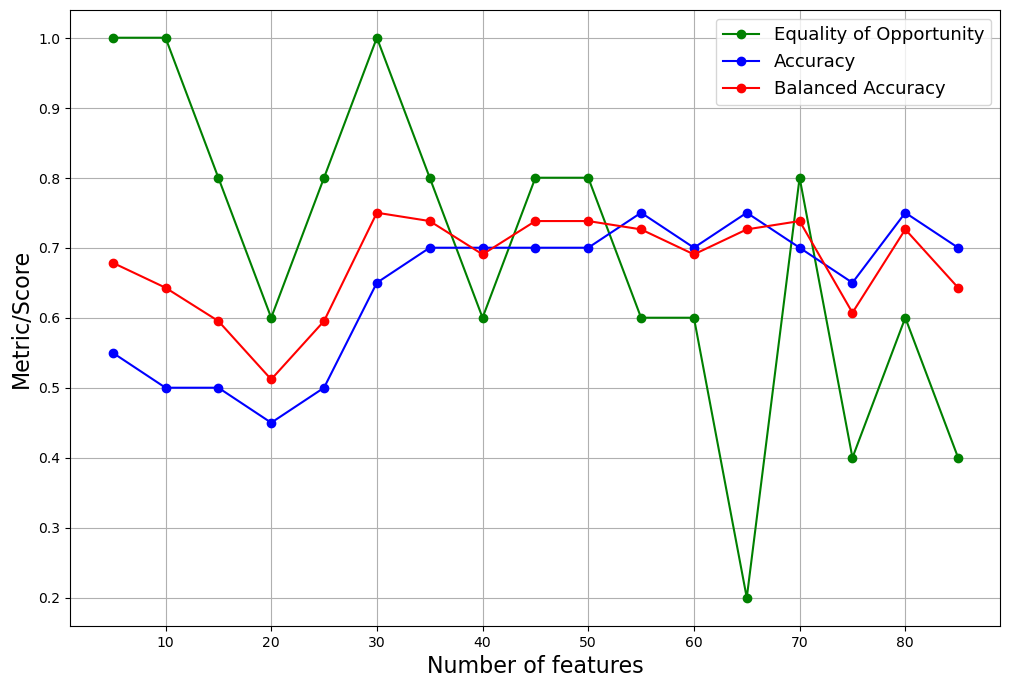

In [6]:
plt.figure(figsize=(12, 8))
plt.plot(n_features_list, eo_scores , 'go-', label="Equality of Opportunity")
plt.plot(n_features_list, acc_lst , 'bo-',  label="Accuracy")
plt.plot(n_features_list, Bacc_lst , 'ro-',  label="Balanced Accuracy")
plt.xlabel("Number of features", fontsize = 16)
plt.ylabel("Metric/Score", fontsize = 16)
plt.legend(fontsize = 13)
plt.grid()
plt.plot()